# Deep Learning with keras and Tensorflow

## Project - Home Loan data Analysis 
Problem Statement --- to build a deep learning model to predict the chance of default for future loans using the historical data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #importing neccessary libraries for data handling and visualisation

### 1. Importing the data

In [282]:
data=pd.read_csv(r"D:\AIML\course 5\Assignment\Datasets_October\House_Loan_Data_Analysis_dataset\loan_data.csv")  

In [283]:
data.info() #to print the basic information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Given Dataset contains 122 columns and approximately 3 lakh records of customers

In [284]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None) #to display all rows and columns

### 2. Understanding the data

In [285]:
data.columns #columns in the given dataset

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

### 2.1 Determining Missing/Null Values

In [48]:
data.isna().sum() #displaying null values in the dataset

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [4]:
(((data.isna().sum()/len(data))*100)).sort_values(ascending=False)
               #displaying the percentage of null values in various columns of the given dataset

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

1. Determining the percentage of missing values in each column
2. If the percentage of missing values in columns are greater than 40%, those columns are dropped.

In [286]:
df=data.drop(['SK_ID_CURR','APARTMENTS_AVG','BASEMENTAREA_AVG','WEEKDAY_APPR_PROCESS_START',
'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','APARTMENTS_AVG','BASEMENTAREA_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI',
'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','BASEMENTAREA_MODE',      
'YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'BASEMENTAREA_MEDI',              
'OWN_CAR_AGE','EXT_SOURCE_1','FLAG_DOCUMENT_2','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',],axis=1)

In [6]:
df.isna().sum() #missing values after dropping columns with > 40% missing values

TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
C

In [7]:
df.describe() #descriptive analysis of the numerical columns 

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.636171e-01,0.669057,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,23.000

Inference:
1. Huge variation between mean and maximum values in income of the client, no of children to client
2. Variation is large between mean and maximum values in credit amount of the loan, loan annuity

### 2.2 Outlier Detection and handling

In [47]:
def outlier_fig1(df):
    sns.set_theme()
    fig,ax=plt.subplots(2,2)
    fig.set_figwidth(10)
    fig.set_figheight(10)
    sns.boxplot(ax=ax[0,0], x=df['AMT_GOODS_PRICE'])
    sns.boxplot(ax=ax[0,1], x=df['AMT_ANNUITY'])
    sns.boxplot(ax=ax[1,0], x=df['AMT_CREDIT'])
    sns.boxplot(ax=ax[1,1], x=df['AMT_INCOME_TOTAL'])
    plt.suptitle('Box plot for handling oultiers')
    plt.show()

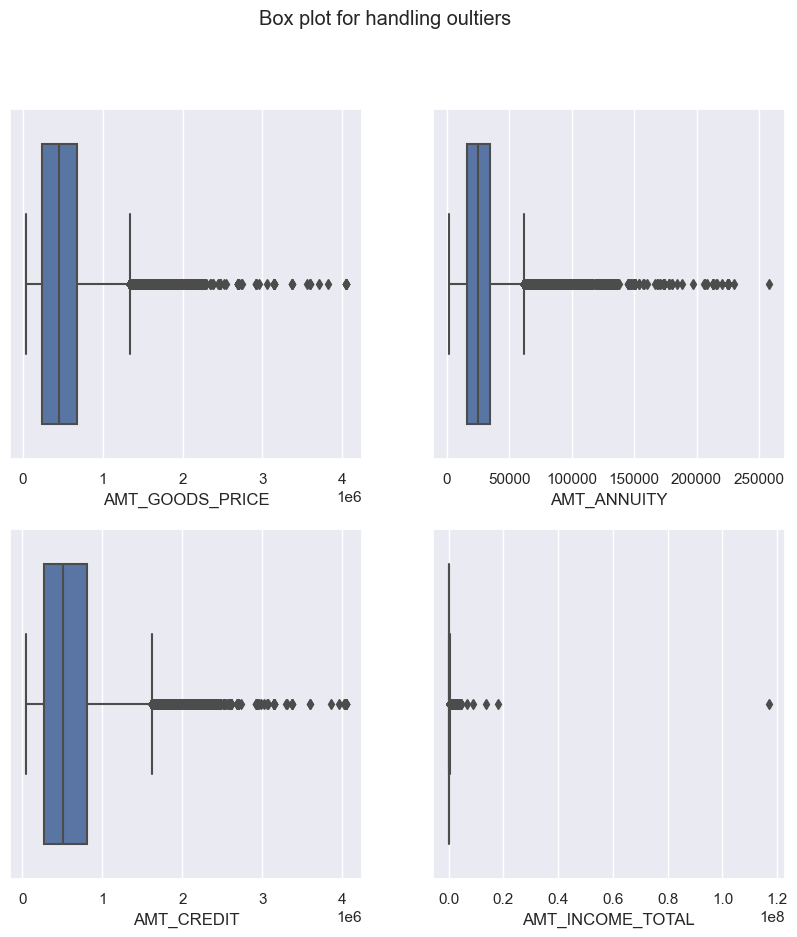

In [48]:
outlier_fig1(df) #box plot for showing outliers in various varibales

1. The above box plot shows the outliers in various variables like income, loan annuity, credit of the loan, goods price etc 
2. Outliers in the data if not treated may lead to overfitting 
3. Handling oultiers - by capping the lower and upper values using Interquartile range(IQR=Q3(0.75)-Q1(0.25))
   upper_value=Q3+1.5IQR
   lower_value=Q1-1.5IQR

In [287]:
IQR=df['AMT_INCOME_TOTAL'].quantile(0.75)-df['AMT_INCOME_TOTAL'].quantile(0.25)
df['AMT_INCOME_TOTAL']=df['AMT_INCOME_TOTAL'].clip(upper=1.5*IQR+df['AMT_INCOME_TOTAL'].quantile(0.75),lower=df['AMT_INCOME_TOTAL'].quantile(0.25)-1.5*IQR)

IQR_GP=df['AMT_GOODS_PRICE'].quantile(0.75)-df['AMT_GOODS_PRICE'].quantile(0.25)
df['AMT_GOODS_PRICE']=df['AMT_GOODS_PRICE'].clip(upper=1.5*IQR_GP+df['AMT_GOODS_PRICE'].quantile(0.75),lower=df['AMT_GOODS_PRICE'].quantile(0.25)-1.5*IQR_GP)

df['AMT_CREDIT']=df['AMT_CREDIT'].clip(upper=1.5*(df['AMT_CREDIT'].quantile(0.75)-df['AMT_CREDIT'].quantile(0.25))+(df['AMT_CREDIT'].quantile(0.75)),lower=df['AMT_CREDIT'].quantile(0.25)-1.5*(df['AMT_CREDIT'].quantile(0.75)-df['AMT_CREDIT'].quantile(0.25)))

df['AMT_ANNUITY']=df['AMT_ANNUITY'].clip(upper=1.5*(df['AMT_ANNUITY'].quantile(0.75)-df['AMT_ANNUITY'].quantile(0.25))+(df['AMT_ANNUITY'].quantile(0.75)),lower=df['AMT_ANNUITY'].quantile(0.25)-1.5*(df['AMT_ANNUITY'].quantile(0.75)-df['AMT_ANNUITY'].quantile(0.25)))

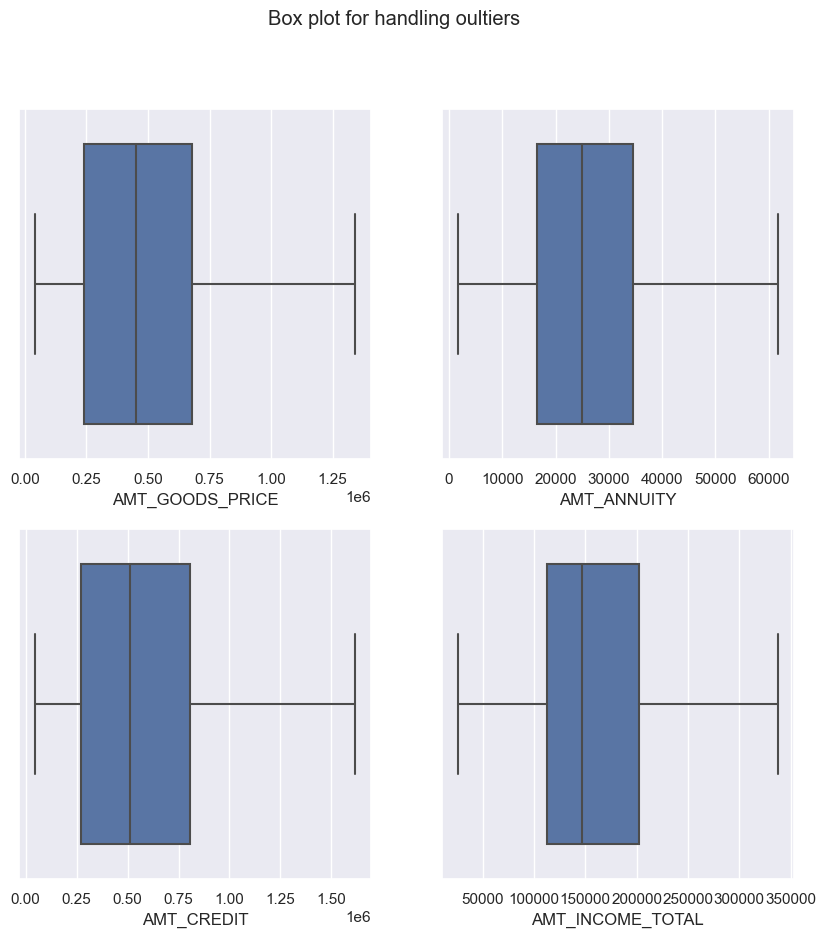

In [51]:
outlier_fig1(df) #Box plot after capping outliers to upper fence value

In [52]:
def outlier_fig2(df):
    sns.set_theme()
    fig3,ax3=plt.subplots(2,2)
    fig3.set_figwidth(10)
    fig3.set_figheight(10)
    sns.boxplot(ax=ax3[0,0], x=df['OBS_30_CNT_SOCIAL_CIRCLE'])
    sns.boxplot(ax=ax3[0,1], x=df['OBS_60_CNT_SOCIAL_CIRCLE'])
    sns.boxplot(ax=ax3[1,0], x=df['DEF_30_CNT_SOCIAL_CIRCLE'])
    sns.boxplot(ax=ax3[1,1], x=df['DEF_60_CNT_SOCIAL_CIRCLE'])
    plt.suptitle('Box plot for handling outliers')
    plt.show()

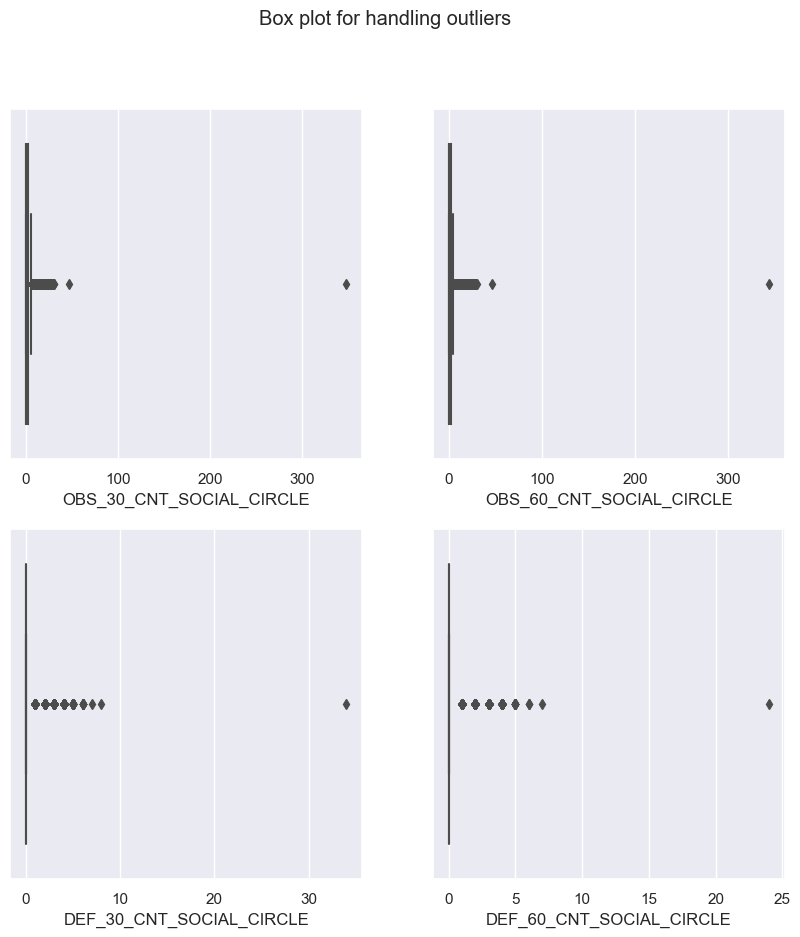

In [158]:
outlier_fig2(df) #box plot- outliers in observable on 30 days and 60 days past due default and defaulted on 30 days and 60 days past due default

In [288]:
df['OBS_30_CNT_SOCIAL_CIRCLE']=df['OBS_30_CNT_SOCIAL_CIRCLE'].clip(upper=1.5*(df['OBS_30_CNT_SOCIAL_CIRCLE'].quantile(0.75)-df['OBS_30_CNT_SOCIAL_CIRCLE'].quantile(0.25))+(df['OBS_30_CNT_SOCIAL_CIRCLE'].quantile(0.75)),lower=df['OBS_30_CNT_SOCIAL_CIRCLE'].quantile(0.25)-1.5*(df['OBS_30_CNT_SOCIAL_CIRCLE'].quantile(0.75)-df['OBS_30_CNT_SOCIAL_CIRCLE'].quantile(0.25)))
df['OBS_60_CNT_SOCIAL_CIRCLE']=df['OBS_60_CNT_SOCIAL_CIRCLE'].clip(upper=1.5*(df['OBS_60_CNT_SOCIAL_CIRCLE'].quantile(0.75)-df['OBS_60_CNT_SOCIAL_CIRCLE'].quantile(0.25))+(df['OBS_60_CNT_SOCIAL_CIRCLE'].quantile(0.75)),lower=df['OBS_60_CNT_SOCIAL_CIRCLE'].quantile(0.25)-1.5*(df['OBS_60_CNT_SOCIAL_CIRCLE'].quantile(0.75)-df['OBS_60_CNT_SOCIAL_CIRCLE'].quantile(0.25)))
df['DEF_30_CNT_SOCIAL_CIRCLE']=df['DEF_30_CNT_SOCIAL_CIRCLE'].clip(upper=1.5*(df['DEF_30_CNT_SOCIAL_CIRCLE'].quantile(0.75)-df['DEF_30_CNT_SOCIAL_CIRCLE'].quantile(0.25))+(df['DEF_30_CNT_SOCIAL_CIRCLE'].quantile(0.75)),lower=df['DEF_30_CNT_SOCIAL_CIRCLE'].quantile(0.25)-1.5*(df['DEF_30_CNT_SOCIAL_CIRCLE'].quantile(0.75)-df['DEF_30_CNT_SOCIAL_CIRCLE'].quantile(0.25)))
df['DEF_60_CNT_SOCIAL_CIRCLE']=df['DEF_60_CNT_SOCIAL_CIRCLE'].clip(upper=1.5*(df['DEF_60_CNT_SOCIAL_CIRCLE'].quantile(0.75)-df['DEF_60_CNT_SOCIAL_CIRCLE'].quantile(0.25))+(df['DEF_60_CNT_SOCIAL_CIRCLE'].quantile(0.75)),lower=df['DEF_60_CNT_SOCIAL_CIRCLE'].quantile(0.25)-1.5*(df['DEF_60_CNT_SOCIAL_CIRCLE'].quantile(0.75)-df['DEF_60_CNT_SOCIAL_CIRCLE'].quantile(0.25)))

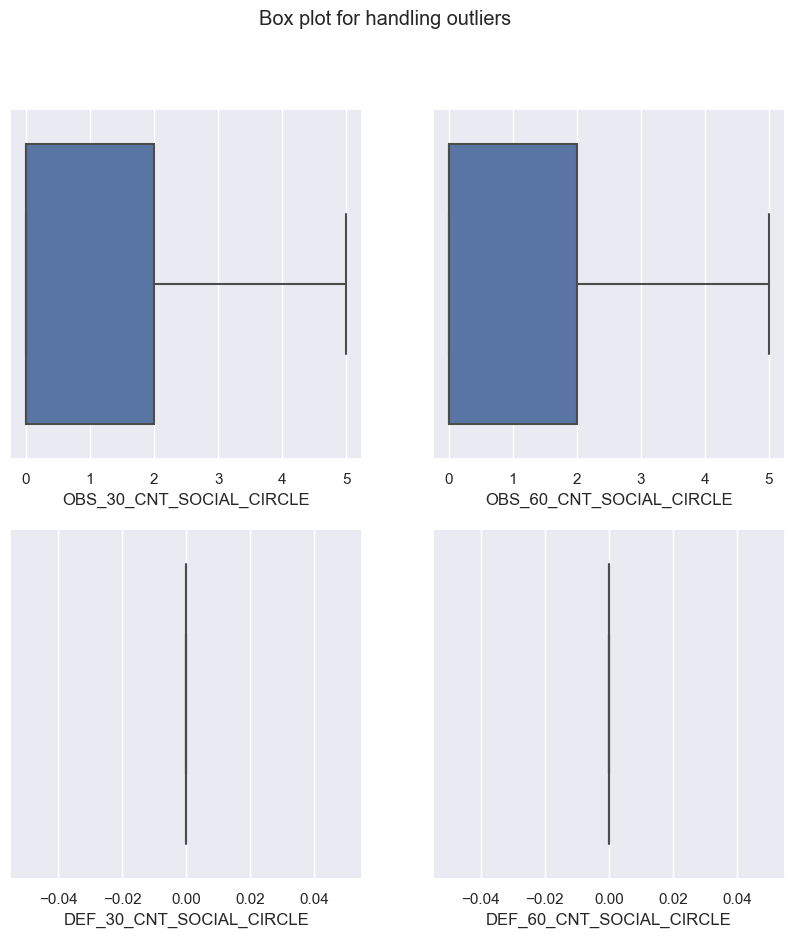

In [54]:
outlier_fig2(df)

### 2.3 Handling missing values

 Plotting the various variables to understand its distribution so that the missing values can be filled with mean, median or mode

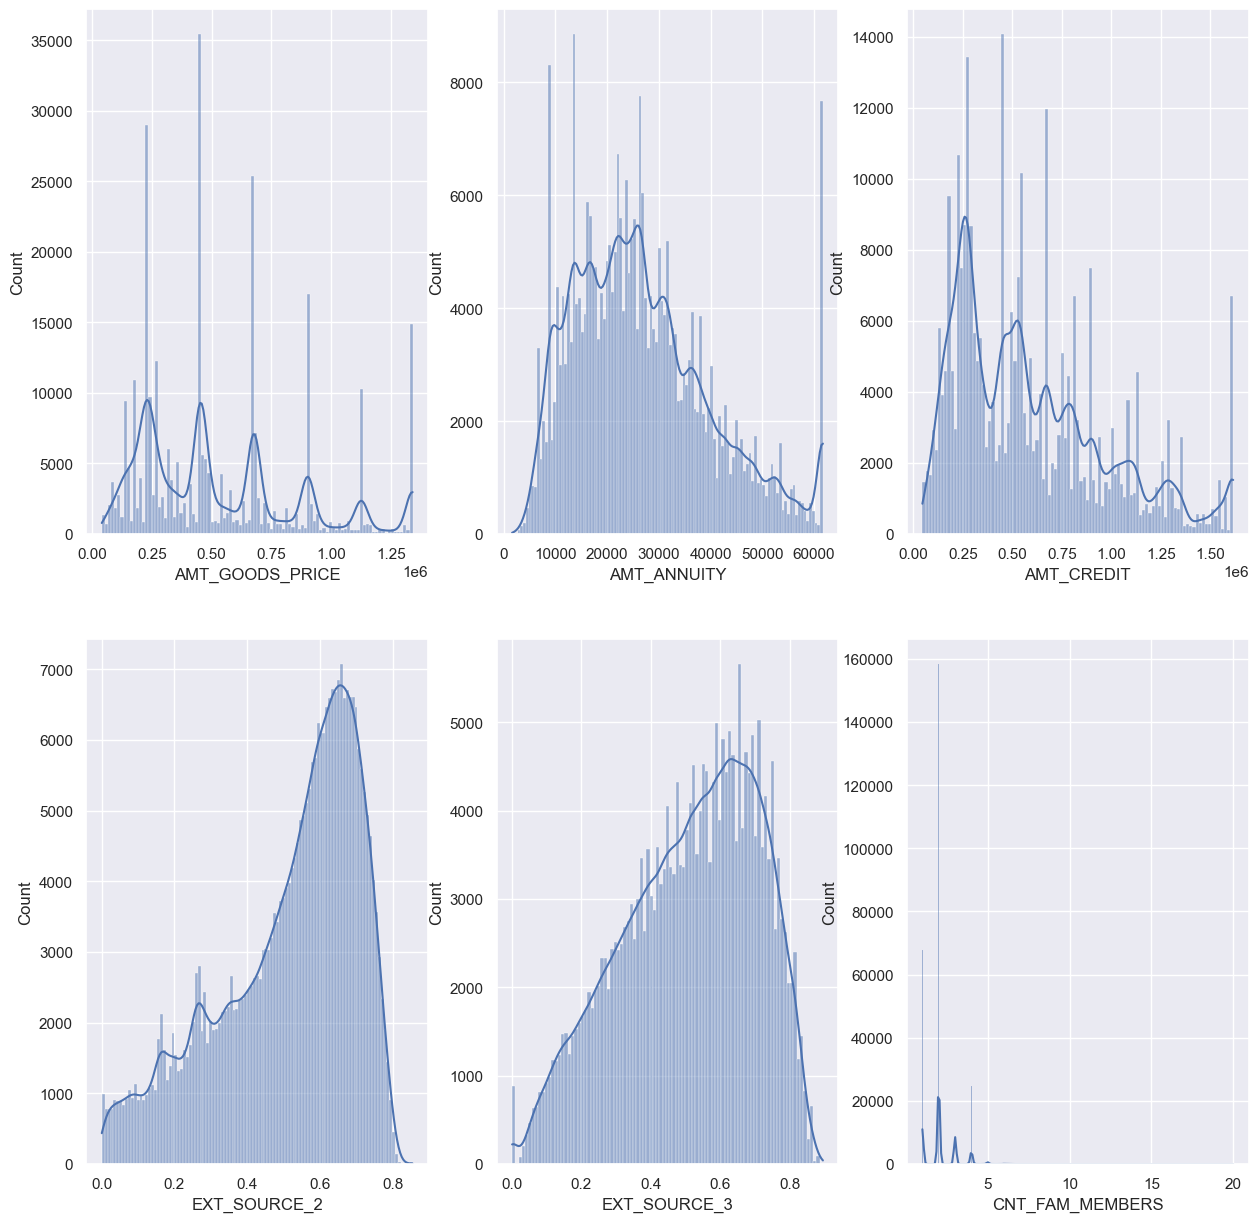

In [39]:
sns.set_theme()
fig1,ax1=plt.subplots(2,3)
fig1.set_figwidth(15)
fig1.set_figheight(15)
sns.histplot(ax=ax1[0,0], x=df['AMT_GOODS_PRICE'],kde=True)
sns.histplot(ax=ax1[0,1], x=df['AMT_ANNUITY'],kde=True)
sns.histplot(ax=ax1[0,2], x=df['AMT_CREDIT'],kde=True)
sns.histplot(ax=ax1[1,0], x=df['EXT_SOURCE_2'],kde=True)
sns.histplot(ax=ax1[1,1], x=df['EXT_SOURCE_3'],kde=True)
sns.histplot(ax=ax1[1,2], x=df['CNT_FAM_MEMBERS'],kde=True)
plt.show()

In [289]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean(),inplace=True)
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mean(),inplace=True)
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean(),inplace=True) 
          #approximately normal distribution so filled the missing values with mean

In [290]:
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].median(),inplace=True) 
                 #Distribution - left skewes so filled with median value as it will be a better approximation

In [291]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)
df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_60_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)
df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)
df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_60_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)

In [60]:
df['OCCUPATION_TYPE'].value_counts() #type of occupation of the various borrowers

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [61]:
df['CNT_FAM_MEMBERS'].value_counts() #no of family members

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [292]:
df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0],inplace=True) 
df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0],inplace=True)
 #these are categorical variables, so missing values filled with mode

In [293]:
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].median(),inplace=True)
     #skewed data, filled with median value

In [294]:
df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].mean(),inplace=True)
df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df['AMT_REQ_CREDIT_BUREAU_HOUR'].mean(),inplace=True)
df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df['AMT_REQ_CREDIT_BUREAU_DAY'].mean(),inplace=True)
df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df['AMT_REQ_CREDIT_BUREAU_WEEK'].mean(),inplace=True)
df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df['AMT_REQ_CREDIT_BUREAU_QRT'].mean(),inplace=True)
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(),inplace=True)
df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df['AMT_REQ_CREDIT_BUREAU_MON'].mean(),inplace=True)
       #no of enquiries- so filled with mean of the value

In [295]:
df.isna().sum() 
 #checking whether the missing values are filled appropriately

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_

### 3. Percentage of default 

In [66]:
df['TARGET'].value_counts() 

0    282686
1     24825
Name: TARGET, dtype: int64

1. Clients who may face payment difficulties - 24825 -- atleast one time paid after due 
2. Clients who paid on/before date -282686

In [67]:
df['TARGET'].count()

307511

In [68]:
percentage_1=(((df['TARGET']==1).sum())/(df['TARGET'].count()))*100
print('Client with payment difficulties in percentage:',percentage_1,'%')

Client with payment difficulties in percentage: 8.072881945686495 %


In [69]:
percentage_0=(((df['TARGET']==0).sum())/(df['TARGET'].count()))*100
print('Client who paid at appropriate time in percentage:',percentage_1,'%')

Client who paid at appropriate time in percentage: 8.072881945686495 %


### 4. Data preparation for modelling

### 4.1 Encoding of Categorical data into Numerical for model building

In [296]:
df_encoded=pd.get_dummies(df,columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE'


 ])#Converting categorical to numerical values using get_dummies in pandas

In [297]:
pd.set_option('display.max_columns',None) #to display all columns

In [298]:
df_encoded.head() #Encoded dataframe

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: typ

In [299]:
X=df_encoded.drop(['TARGET'],axis=1)# all variables other than who may default are taken as X variable
y=df_encoded['TARGET'] #y variable - default or not default

In [300]:
X.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'ORGANIZATION_TYPE_Trade: type 4', 'ORGANIZATION_TYPE_Trade: type 5',
       'ORGANIZATION_TYPE_Trade: type 6', 'ORGANIZATION_TYPE_Trade: type 7',
       'ORGANIZATION_TYPE_Transport: type 1',
       'ORGANIZATION_TYPE_Transport: type 2',
       'ORGANIZATION_TYPE_Transport: type 3',
       'ORGANIZATION_TYPE_Transport: type 4', 'ORGANIZATION_TYPE_University',
       'ORGANIZATION_TYPE_XNA'],
      dtype='object', length=156)

### 4.2 Standarisation

Columns have values is different ranges,it may lead to biasness in the model, hence they are Standarised using standard scaler 

In [301]:
from sklearn.preprocessing import StandardScaler #importing Standard Scaler

In [302]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)# X variables are standarised

### 4.3 Balancing the Imbalanced dataset using SMOTE

In [303]:
y.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

The above count shows that the data is highly imbalanced and needs to be treated, else it leads to biasness in the model

Using Synthetic Minority Oversampling Technique(SMOTE), the data is balanced by duplicating existing minority values

In [304]:
from imblearn.over_sampling import SMOTE  #importing SMOTE from Imblearn module
sm=SMOTE(random_state=23)
X,y=sm.fit_resample(X_std,y)#resampling the data

In [305]:
y.value_counts()

1    282686
0    282686
Name: TARGET, dtype: int64

Now the data is balanced

In [318]:
from sklearn.model_selection import train_test_split  #for splitting the data into train and test data

In [319]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123) 
           #Splitting the data into train and test set 80% for training and 20% for testing

In [320]:
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape) #Shape of test and train data

Shape of X_train: (452297, 156)
Shape of X_test: (113075, 156)
Shape of y_train: (452297,)
Shape of y_test: (113075,)


In [321]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
# check the shape again
X_train.shape, X_test.shape  #Reshaping the data before feeding into the model

((452297, 156, 1), (113075, 156, 1))

### 5. Model Building using CNN (Convolutional Neural Network)

In [322]:
import tensorflow as tf #importing tensorflow for bulding deep learning model

In [323]:
from keras.models import Sequential #for Sequential model building
from keras.layers import Dense, Conv1D, BatchNormalization, Flatten, Dropout 
       #importing various neural network layers from keras for bulding the model

In [324]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=2, input_shape=(X_train[0].shape), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv1D(filters=32, kernel_size=2, input_shape=(X_train[0].shape), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))

# Flattening Layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(1, activation='sigmoid')) 

 1. Convolutional 1D layer is used as our data is 1 dimensional. Appropriate number of filters and kernel size are used to extract the features from the dataset.
 
 2. Batch Normalisation- stabilizes training, accelerate convergence and mitigate the vanishing gradient problem, resulting in faster and more stable training of the network.
 
 3. Dropout - to prevent overfitting of the model
 
 4. Sigmoid Activation function is used in the final output layer(whose ouput is probability value)  as we have to do binary classification 

In [325]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 155, 32)           96        
                                                                 
 batch_normalization_14 (Ba  (None, 155, 32)           128       
 tchNormalization)                                               
                                                                 
 dropout_26 (Dropout)        (None, 155, 32)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 154, 32)           2080      
                                                                 
 batch_normalization_15 (Ba  (None, 154, 32)           128       
 tchNormalization)                                               
                                                                 
 dropout_27 (Dropout)        (None, 154, 32)         

### 5.1 Compilation of  model 
 ---- using Sensitivity and Accuracy as evaluation metrics
 
 Sensitivity = TP/(TP+FN)
 The model doesnot want to miss anyone who may default that is, predicting who may default as non-defaulter. It has to produce zero false negatives. Hence, Sensitivity  is taken as a metric.

In [326]:
m=tf.keras.metrics.SensitivityAtSpecificity(0.5)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',m])

In [327]:
model.fit(X_train, y_train,batch_size=100, epochs=15,validation_split=0.2) #Fitting the model

Epoch 1/15
3619/3619 [==============================] - 125s 34ms/step - loss: 0.4477 - accuracy: 0.7878 - sensitivity_at_specificity_10: 0.9253 - val_loss: 0.3375 - val_accuracy: 0.8549 - val_sensitivity_at_specificity_10: 0.9583
Epoch 2/15
3619/3619 [==============================] - 123s 34ms/step - loss: 0.3743 - accuracy: 0.8263 - sensitivity_at_specificity_10: 0.9419 - val_loss: 0.3296 - val_accuracy: 0.8521 - val_sensitivity_at_specificity_10: 0.9615
Epoch 3/15
3619/3619 [==============================] - 122s 34ms/step - loss: 0.3445 - accuracy: 0.8422 - sensitivity_at_specificity_10: 0.9496 - val_loss: 0.2843 - val_accuracy: 0.8842 - val_sensitivity_at_specificity_10: 0.9660
Epoch 4/15
3619/3619 [==============================] - 105s 29ms/step - loss: 0.3269 - accuracy: 0.8519 - sensitivity_at_specificity_10: 0.9527 - val_loss: 0.2734 - val_accuracy: 0.8840 - val_sensitivity_at_specificity_10: 0.9675
Epoch 5/15
3619/3619 [==============================] - 81s 22ms/step - loss

### 5.3 Model Evaluation

In [328]:
score = model.evaluate(X_test, y_test)#evaluating the model for test data
print('Test Loss: ', score[0])
print(f'Test Accuracy : {score[1] * 100:.2f}%')

3534/3534 [==============================] - 8s 2ms/step - loss: 0.2513 - accuracy: 0.8948 - sensitivity_at_specificity_10: 0.9721
Test Loss:  0.25134551525115967
Test Accuracy : 89.48%


In [329]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [330]:
## Making Prediction for test data -- converting the probabiltiy from output layer of CNN to Binary classification(1 or 0)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
        #returns 0 if value is less than 0.5 and 1 if > 0.5

3534/3534 [==============================] - 8s 2ms/step


In [331]:
print('Accuracy is:',(accuracy_score(y_test, y_pred)*100).round(2),'%')#Accuracy of predictions

Accuracy is: 89.48 %


In [332]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
tp, fn, fp, tn = cm.ravel()
 
# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
 
print('Sensitivity is:',sensitivity)

Sensitivity is: 0.9860370337556481


Sensitivity value of 0.99 shows that our model has almost eliminated false negatives so that atmost defaulters will can be identified correctly

In [336]:
cm

array([[55647,   788],
       [11113, 45527]], dtype=int64)

In [333]:
print('ROC-AUC score is:',roc_auc_score(y_test, y_pred))

ROC-AUC score is: 0.8949164688552251


In [334]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)

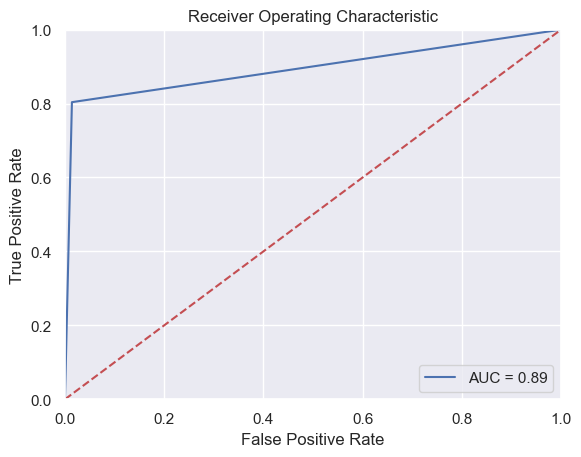

In [335]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Inference :
ROC-AUC Score - 0.89 implies that the neural network model built will be better able to distinguish the defaulter from non-defaulters. 